# Monte Carlo Simulation

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

Average Total Win% = 39.96%
Highest Win% = 47.67%
Lowest Win% = 34.33%


Total Return = 179 X
Average Profits = $17,948


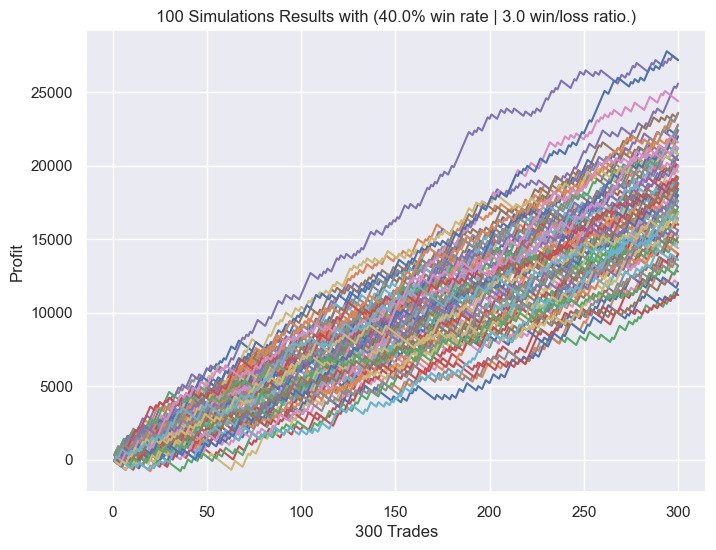

In [195]:
# set seed to ensure reproducibility 
random.seed(42) # Testing purpose only

# generate a sample with probability n%
def generate_samples(numTrades,winRate,profit,loss):
    trades = []
    results = 0
    cum_profit = []
    total_profit = 0
    
    # Find weigthed choice win or loss.
    def weigthed_choice(winRate):
        #loss_rate = 1 - winRate
        return random.choices([1,0], weights=[winRate, (1 - winRate)])[0]
    
    # Generate trades with index
    for i in range(numTrades):
        result = weigthed_choice(winRate)
        #trades.append(result)
        if result == 1:
            total_profit += profit  # add profit
            results += 1
        else:
            total_profit += loss  # add loss  
            results   
        cum_profit.append(total_profit)   
        trades.append(results)
    #return trades, cum_profit,total_profit
    return trades, cum_profit

# user input
numTrades = 300
winRate = 40.0
risk = 100.00
winRatio = 3.00
num_simulations = 100

# calculate the profit
profit = winRatio*risk
loss = -1*risk

# Run the simulation N times
df = pd.DataFrame(index=range(1,numTrades+1), columns=range(1,num_simulations+1))
df_trades = pd.DataFrame(index=range(1,numTrades+1), columns=range(1,num_simulations+1))

def monte_carlo(n):
    for i in range(1,n+1):
        # trades results
        winLossResults,tradeResults = generate_samples(numTrades, winRate/100, profit, loss)
        # profit results
        df[i] = tradeResults  
        # win or loss results
        df_trades[i] = winLossResults
    return df,df_trades
       
df,df_trades = monte_carlo(num_simulations)

# print the results from win or loss ratio
final_trades =list(df_trades.tail(1).values[0]/numTrades)
#print(final_trades)
averageWinLoss = np.mean(final_trades)
print("Average Total Win% = {:,.2f}%".format(averageWinLoss*100))
print("Highest Win% = {:,.2f}%".format(max(final_trades)*100))
print("Lowest Win% = {:,.2f}%".format(min(final_trades)*100))

print('\n')
# create a dataframe to show the results
avgerageProfits = np.mean(list(df.tail(1).values[0]))
#format the output dollars
print("Total Return = {:,.0f} X".format(avgerageProfits/risk))
print("Average Profits = ${:,.0f}".format(avgerageProfits))


fig = plt.figure(figsize=(8,6))
plt.plot(df)
plt.title(f"{num_simulations} Simulations Results with ({winRate}% win rate | {winRatio} win/loss ratio.)")
plt.xlabel(f"{numTrades} Trades")
plt.ylabel("Profit")
plt.show()


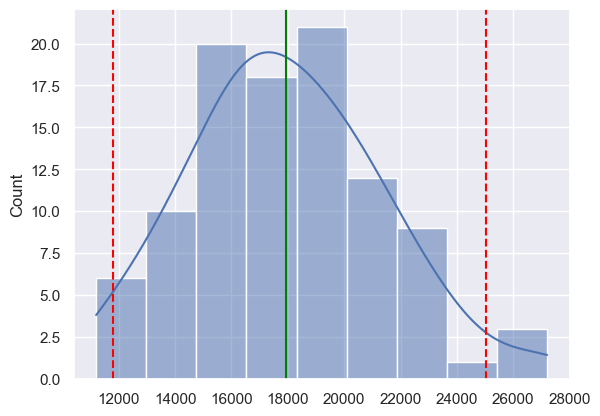

In [189]:
# plot distribution for Profit Results
final_resutls = (df.tail(1)).values[0]
lower, upper = np.quantile(final_resutls, (0.025, 0.975))

sns.histplot(final_resutls, kde=True, legend=False)
plt.axvline(x=final_resutls.mean(), color='green')
plt.axvline(x=lower, color='red',linestyle='--')
plt.axvline(x=upper, color='red',linestyle='--')
plt.show()


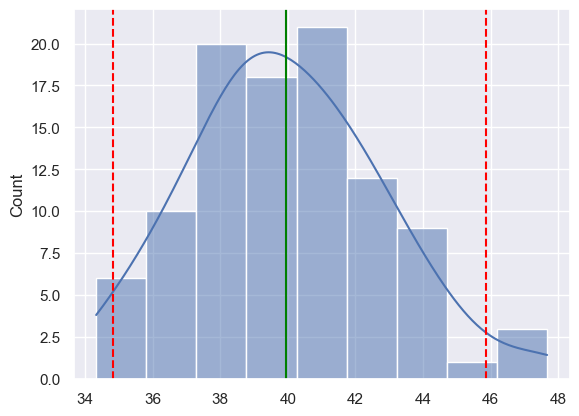

In [190]:
# Plot distribution of win ratio
final_resutls = (df_trades.tail(1)/numTrades).values[0]*100
lower, upper = np.quantile(final_resutls, (0.025, 0.975))

sns.histplot(final_resutls, kde=True, legend=False)
plt.axvline(x=final_resutls.mean(), color='green')
plt.axvline(x=lower, color='red',linestyle='--')
plt.axvline(x=upper, color='red',linestyle='--')
plt.show()



# Run N simulations multiple times


Average Total Win% = 38.60%
Highest Win% = 42.00%
Lowest Win% = 36.67%


Total Return = 163 X
Average Profits = $16,320


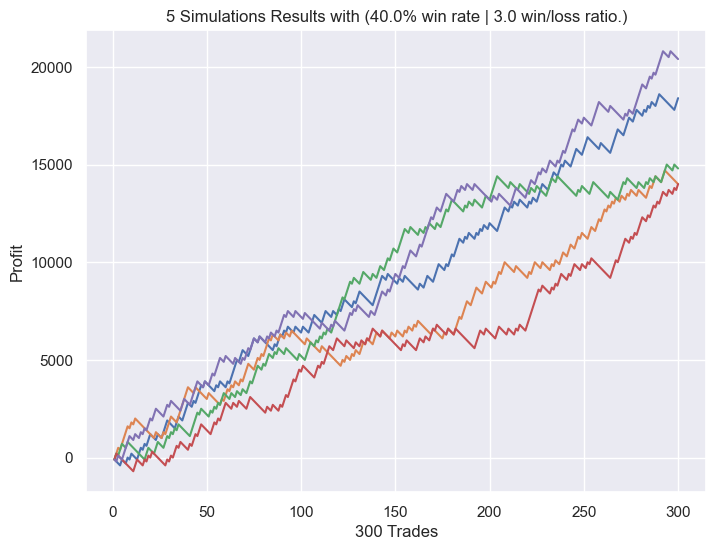

Average Total Win% = 40.60%
Highest Win% = 47.67%
Lowest Win% = 34.33%


Total Return = 187 X
Average Profits = $18,720


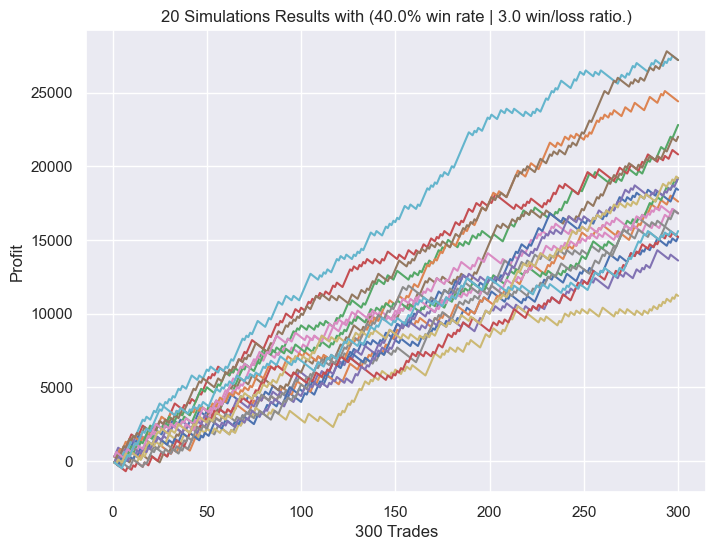

Average Total Win% = 39.96%
Highest Win% = 46.67%
Lowest Win% = 31.67%


Total Return = 179 X
Average Profits = $17,947


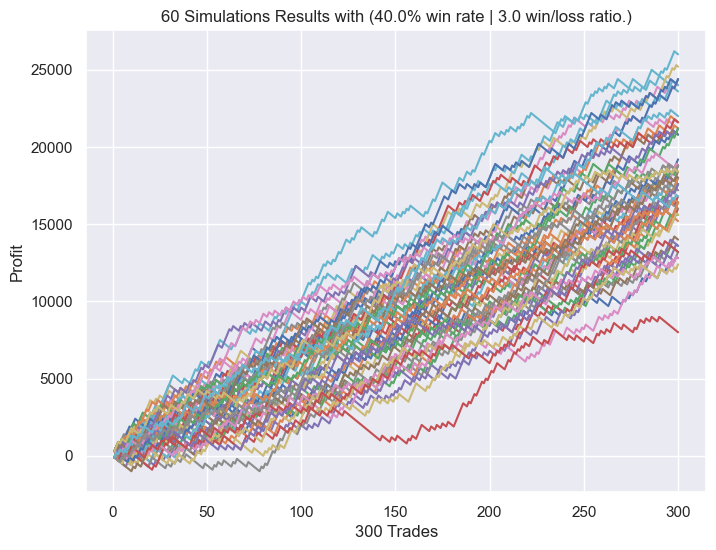

In [215]:
# run simulations multiple times

def run_simulation(num_simulations,numTrades,winRate,risk,winRatio):
    
    # set seed to ensure reproducibility 
    #random.seed(42) # Testing purpose only

    # generate a sample with probability n%
    def generate_samples(numTrades,winRate,profit,loss):
        trades, cum_profit = [],[]
        results,total_profit = 0,0
        #cum_profit = []
        #total_profit = 0

        # Find weigthed choice win or loss.
        def weigthed_choice(winRate):
            #loss_rate = 1 - winRate
            return random.choices([1,0], weights=[winRate, (1 - winRate)])[0]

        # Generate trades with index
        for i in range(numTrades):
            result = weigthed_choice(winRate)
            #trades.append(result)
            if result == 1:
                total_profit += profit  # add profit
                results += 1
            else:
                total_profit += loss  # add loss  
                results   
            cum_profit.append(total_profit)   
            trades.append(results)
        #return trades, cum_profit,total_profit
        return trades, cum_profit

    # calculate the profit
    profit = winRatio*risk
    loss = -1*risk # loss is negative 

    # Run the simulation N times
    df = pd.DataFrame(index=range(1,numTrades+1), columns=range(1,num_simulations+1))
    df_trades = pd.DataFrame(index=range(1,numTrades+1), columns=range(1,num_simulations+1))

    def monte_carlo(n):
        for i in range(1,n+1):
            # trades results
            winLossResults,tradeResults = generate_samples(numTrades, winRate/100, profit, loss)
            # profit results
            df[i] = tradeResults  
            # win or loss results
            df_trades[i] = winLossResults
        return df,df_trades
           
    df,df_trades = monte_carlo(num_simulations)
    
    # print the results from win or loss ratio
    final_trades =list(df_trades.tail(1).values[0]/numTrades)
    #print(final_trades)
    averageWinLoss = np.mean(final_trades)
    print("Average Total Win% = {:,.2f}%".format(averageWinLoss*100))
    print("Highest Win% = {:,.2f}%".format(max(final_trades)*100))
    print("Lowest Win% = {:,.2f}%".format(min(final_trades)*100))
    
    print('\n')
    # create a dataframe to show the results
    avgerageProfits = np.mean(list(df.tail(1).values[0]))
    #format the output dollars
    print("Total Return = {:,.0f} X".format(avgerageProfits/risk))
    print("Average Profits = ${:,.0f}".format(avgerageProfits))
    
    
    fig = plt.figure(figsize=(8,6))
    plt.plot(df)
    plt.title(f"{num_simulations} Simulations Results with ({winRate}% win rate | {winRatio} win/loss ratio.)")
    plt.xlabel(f"{numTrades} Trades")
    plt.ylabel("Profit")
    plt.show()

# user input
numTrades = 300
winRate = 40.0
risk = 100.00
winRatio = 3.00
test = [5,20,60]
for i in test:
    run_simulation(i,numTrades,winRate,risk,winRatio)